# EDA



Se importa las librerias necearias para realizar el respectivo EDA

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

Se leen el archivo de los datos con pandas

In [2]:
data = pd.read_json("../data/0_raw/MLA_100k.jsonlines", lines=True)

### Generalidades del dataframe

In [3]:
data.head()

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,NaN,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,NaN,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


In [4]:
data.shape

(100000, 48)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

In [6]:
data.columns

Index(['seller_address', 'warranty', 'sub_status', 'condition',
       'seller_contact', 'deal_ids', 'base_price', 'shipping',
       'non_mercado_pago_payment_methods', 'seller_id', 'variations',
       'location', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'geolocation', 'sold_quantity', 'available_quantity'],
      dtype='object')

In [7]:
data.dtypes

seller_address                                   object
warranty                                         object
sub_status                                       object
condition                                        object
seller_contact                                   object
deal_ids                                         object
base_price                                      float64
shipping                                         object
non_mercado_pago_payment_methods                 object
seller_id                                         int64
variations                                       object
location                                         object
site_id                                          object
listing_type_id                                  object
price                                           float64
attributes                                       object
buying_mode                                      object
tags                                            

### Limpieza de los datos 

#### Datos nulos

In [8]:
data.isnull().sum()

seller_address                           0
warranty                             60896
sub_status                               0
condition                                0
seller_contact                       97781
deal_ids                                 0
base_price                               0
shipping                                 0
non_mercado_pago_payment_methods         0
seller_id                                0
variations                               0
location                                 0
site_id                                  0
listing_type_id                          0
price                                    0
attributes                               0
buying_mode                              0
tags                                     0
listing_source                           0
parent_item_id                       23011
coverage_areas                           0
category_id                              0
descriptions                             0
last_update

Tnemos muchos atos nulos en algunas columnas, para poder tomar una decision, vamos a ver por porcetajes de las columans con datos nulos.

In [9]:
def porcentaje_nulos(data):
    nulos_columnas = data.isnull().mean() * 100 
    nulos_columnas = nulos_columnas.round(2)

    print("Porcentaje de nulos por columna")
    for columna, porcentaje in nulos_columnas.items():
        print(f"{columna}: {porcentaje}%")
    return nulos_columnas
porcentaje_nulos(data)


Porcentaje de nulos por columna
seller_address: 0.0%
warranty: 60.9%
sub_status: 0.0%
condition: 0.0%
seller_contact: 97.78%
deal_ids: 0.0%
base_price: 0.0%
shipping: 0.0%
non_mercado_pago_payment_methods: 0.0%
seller_id: 0.0%
variations: 0.0%
location: 0.0%
site_id: 0.0%
listing_type_id: 0.0%
price: 0.0%
attributes: 0.0%
buying_mode: 0.0%
tags: 0.0%
listing_source: 0.0%
parent_item_id: 23.01%
coverage_areas: 0.0%
category_id: 0.0%
descriptions: 0.0%
last_updated: 0.0%
international_delivery_mode: 0.0%
pictures: 0.0%
id: 0.0%
official_store_id: 99.18%
differential_pricing: 100.0%
accepts_mercadopago: 0.0%
original_price: 99.86%
currency_id: 0.0%
thumbnail: 0.0%
title: 0.0%
automatic_relist: 0.0%
date_created: 0.0%
secure_thumbnail: 0.0%
stop_time: 0.0%
status: 0.0%
video_id: 97.02%
catalog_product_id: 99.99%
subtitle: 100.0%
initial_quantity: 0.0%
start_time: 0.0%
permalink: 0.0%
geolocation: 0.0%
sold_quantity: 0.0%
available_quantity: 0.0%


seller_address                        0.00
warranty                             60.90
sub_status                            0.00
condition                             0.00
seller_contact                       97.78
deal_ids                              0.00
base_price                            0.00
shipping                              0.00
non_mercado_pago_payment_methods      0.00
seller_id                             0.00
variations                            0.00
location                              0.00
site_id                               0.00
listing_type_id                       0.00
price                                 0.00
attributes                            0.00
buying_mode                           0.00
tags                                  0.00
listing_source                        0.00
parent_item_id                       23.01
coverage_areas                        0.00
category_id                           0.00
descriptions                          0.00
last_update

Se elimina las columnas que tinenen un porcetaje mayor al 50%, ademas tener en cuenta la column de parent_item_id, que tiene un 24%, esto sera importante mas a delnate para la seleccion de columnas relevamantes para el entranamiento del modelo.

In [10]:

data.drop(columns=["original_price","video_id","subtitle","differential_pricing","official_store_id","seller_contact","warranty","catalog_product_id"], inplace=True)

#### Datos duplicados 

En algunas columnas del dataset hay columnas que tinen diccionarios, lo que se porcede a identifcar esas columnas. 


In [11]:
def columnas_diccionario(data):
    columnas = [
    ]
    for col in data.columns:
        if data[col].apply(lambda x: isinstance(x, dict)).any():
            columnas.append(col)
    if columnas:
        print("Columnas con diccionarios:")
        for col in columnas:
            print(f"- {col}")
    else:
        print("No hay columnas con diccionarios.")
    return columnas
columnas_diccionario(data)
        

Columnas con diccionarios:
- seller_address
- shipping
- location
- geolocation


['seller_address', 'shipping', 'location', 'geolocation']

Que tiene dentro de los diccionrios estas columnas y sis es relevanate para entrenar el modelo.

In [12]:
data.loc[3,"shipping"]

{'local_pick_up': True,
 'methods': [],
 'tags': [],
 'free_shipping': False,
 'mode': 'me2',
 'dimensions': None}

infromacion relvante de la columnn de shipping es mode que se trata de suele aplicarse a productos nuevos o con logística más profesional, y sihacen envios gratis, que se porductos nuevos es muy probabale que se haga. 

In [13]:
data.loc[1,"seller_address"]

{'comment': '',
 'longitude': -58.5059173,
 'id': 105272448,
 'country': {'name': 'Argentina', 'id': 'AR'},
 'address_line': '',
 'latitude': -34.5935524,
 'search_location': {'neighborhood': {'name': 'Villa Devoto',
   'id': 'TUxBQlZJTDYzNzZa'},
  'state': {'name': 'Capital Federal', 'id': 'TUxBUENBUGw3M2E1'},
  'city': {'name': 'Capital Federal', 'id': 'TUxBQ0NBUGZlZG1sYQ'}},
 'zip_code': '',
 'city': {'name': 'Buenos Aires', 'id': ''},
 'state': {'name': 'Capital Federal', 'id': 'AR-C'}}

Esta columna es la de direccion del venderos lo que no es relevante pra saber si es nuevo o usado.

In [14]:
data.loc[4,"location"]

{}

Este tambien se intento con varos indices, entoces vamos a reliazar el mismo proceso.

Se reemplaza los vacios con unkown

In [15]:
data["location"] = data["location"].apply(lambda x: {"contact": "unknown"} if pd.isna(x) or (isinstance(x, dict) and not x) else x)
print(data["location"])

0        {'contact': 'unknown'}
1        {'contact': 'unknown'}
2        {'contact': 'unknown'}
3        {'contact': 'unknown'}
4        {'contact': 'unknown'}
                  ...          
99995    {'contact': 'unknown'}
99996    {'contact': 'unknown'}
99997    {'contact': 'unknown'}
99998    {'contact': 'unknown'}
99999    {'contact': 'unknown'}
Name: location, Length: 100000, dtype: object


In [16]:
def porcentaje_unknowns(df, columna):
    total_filas = len(df)
    unknowns = sum(df[columna].apply(lambda x: x == {"contact": "unknown"}))
    
    porcentaje = (unknowns / total_filas) * 100 if total_filas > 0 else 0
    
    porcentaje = round(porcentaje, 2)
    
    print(f"Porcentaje de 'unknown' en la columna '{columna}': {porcentaje}%")
    print(f"Total de filas: {total_filas}")
    print(f"Filas con 'unknown': {unknowns}")
    
    return porcentaje

In [17]:
porcentaje_unknowns(data,"location")

Porcentaje de 'unknown' en la columna 'location': 97.78%
Total de filas: 100000
Filas con 'unknown': 97781


97.78

Con este procetaje no es recomendable tener esat columna para le modelo, no es relevante para el modelo.

In [18]:
data.loc[10,"geolocation"]

{'latitude': -35.0563824, 'longitude': -58.7583331}

Esta columna es para la geolocacion y no es necaria para el modelo.

Ya tenemos seleccionado los diccionarios relevantes para el modelo, vamos a creer las dos nuevas columnas que la vamos a extrarer de shipping, y elie inar los otros diccionarios 

In [19]:

data['shipping_free_shipping'] = data['shipping'].apply(lambda x: x.get('free_shipping', False))
data['shipping_mode'] = data['shipping'].apply(lambda x: x.get('mode', None))

Eliminar los diccionarios que no son relevantes y la columna shipping ya que se crearon las columnas neuvas

In [20]:
data.drop(columns=["shipping"], inplace=True)
data.drop(columns=["location"], inplace=True)
data.drop(columns=["geolocation"], inplace=True)
data.drop(columns=["seller_address"], inplace=True)

In [21]:
def columnas_list(df):
    columnas = []
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, list)).any():
            columnas.append(col)
    if columnas:
        print("Columnas con listas:")
        for col in columnas:
            print(f"- {col}")
    else:
        print("No hay columnas con listas.")
    return columnas
columnas_list(data)

Columnas con listas:
- sub_status
- deal_ids
- non_mercado_pago_payment_methods
- variations
- attributes
- tags
- coverage_areas
- descriptions
- pictures


['sub_status',
 'deal_ids',
 'non_mercado_pago_payment_methods',
 'variations',
 'attributes',
 'tags',
 'coverage_areas',
 'descriptions',
 'pictures']

In [22]:
def ver_listas_columna(df, columna, max_ejemplos=5):
    print(f"Inspeccionando listas en la columna '{columna}':")
    
    if columna not in df.columns:
        print(f"Error: La columna '{columna}' no existe. Columnas disponibles: {list(df.columns)}")
        return
    
    listas = df[columna][df[columna].apply(lambda x: isinstance(x, list))]
    
    if listas.empty:
        print(f"No hay listas en la columna '{columna}'.")
        return
    
    print(f"Ejemplos de listas (máximo {max_ejemplos}):")
    for idx, lista in listas.head(max_ejemplos).items():
        print(f"Fila {idx}: {lista} (Elementos: {len(lista)})")
        if not lista:
            print("  (Lista vacía)")

    total_listas = len(listas)
    listas_vacias = sum(1 for lista in listas if not lista)
    print(f"\nResumen:")
    print(f"Total de listas en la columna: {total_listas}")
    print(f"Listas vacías: {listas_vacias} )")



In [23]:
ver_listas_columna(data, "non_mercado_pago_payment_methods", max_ejemplos=5)
ver_listas_columna(data, "attributes", max_ejemplos=5)
ver_listas_columna(data, "tags", max_ejemplos=5)
ver_listas_columna(data, "coverage_areas", max_ejemplos=5)
ver_listas_columna(data, "descriptions", max_ejemplos=5)
ver_listas_columna(data, "pictures", max_ejemplos=5)
ver_listas_columna(data, "variations", max_ejemplos=5)
ver_listas_columna(data, "deal_ids", max_ejemplos=5)
ver_listas_columna(data, "sub_status", max_ejemplos=5)


Inspeccionando listas en la columna 'non_mercado_pago_payment_methods':
Ejemplos de listas (máximo 5):
Fila 0: [{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Acordar con el comprador', 'id': 'MLAWC', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}] (Elementos: 3)
Fila 1: [{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}] (Elementos: 2)
Fila 2: [{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Tarjeta de crédito', 'id': 'MLAOT', 'type': 'N'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}] (Elementos: 3)
Fila 3: [{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Tarjeta de crédito', 'id': 'MLAOT', 'type': 'N'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}] (Elementos: 3)
Fila 4: [{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'

Se vana  eliminar estos loistas ya que estas columnas teinen muchos datos nulos y esto afecta considerabalemente para entrenar el modelo, lo que se proiricia la cantida de los datos, pero una columna que pued  ser muy relevante seria de 'non_mercado_pago_payment_methods', que aprioi tine informacion relvante para el entrenamiento del modelo.

In [24]:
data.drop(columns=["non_mercado_pago_payment_methods"], inplace=True)
data.drop(columns=["deal_ids"], inplace=True)
data.drop(columns=["sub_status"], inplace=True)
data.drop(columns=["variations"], inplace=True)
data.drop(columns=["coverage_areas"], inplace=True)
data.drop(columns=["descriptions"], inplace=True)
data.drop(columns=["tags"], inplace=True)
data.drop(columns=["pictures"], inplace=True)
data.drop(columns=["attributes"], inplace=True)

In [25]:
datos_duplicados = data[data.duplicated()]
print("Numero de filas duplicadas:", datos_duplicados.shape)

Numero de filas duplicadas: (0, 29)


No hay datos duplicados en el dataset, pero se logra identificar muchas columnas, ahora debemos hacer eel analsis para saber que columnas son optimas para el modelo.

In [26]:
data.shape

(100000, 29)

In [27]:
data.isnull().sum()

condition                          0
base_price                         0
seller_id                          0
site_id                            0
listing_type_id                    0
price                              0
buying_mode                        0
listing_source                     0
parent_item_id                 23011
category_id                        0
last_updated                       0
international_delivery_mode        0
id                                 0
accepts_mercadopago                0
currency_id                        0
thumbnail                          0
title                              0
automatic_relist                   0
date_created                       0
secure_thumbnail                   0
stop_time                          0
status                             0
initial_quantity                   0
start_time                         0
permalink                          0
sold_quantity                      0
available_quantity                 0
s

In [28]:
data["parent_item_id"].unique()

array(['MLA568261029', 'MLA561574487', 'MLA568881256', ...,
       'MLA546779779', 'MLA565452340', 'MLA570689700'],
      shape=(76990,), dtype=object)

Esta columna que tinen ulos solo es un id del item y no tiene ninguna categoria relevante para el modelo, esntoces se puede eliminar. 

In [29]:
data.drop(columns=["parent_item_id"], inplace=True)

In [30]:
data.shape

(100000, 28)

#### Escoger columnas necesarias 

Como sabemos la columna objetivo es condition para saber si es usado o nuevo, apiriori esta columan es object, se puede decir que es categorica, debemos espeficar que datos hay en esat columna, y que tecnicas debemos utlizar para esocger las columnas relevnates para el modelo. Y depues pasar a bianria esat columna

In [31]:
data["condition"].unique()

array(['new', 'used'], dtype=object)

In [32]:
data["state_condition"] = data["condition"].map({"new": 0, "used": 1})

In [33]:
data.drop(columns=["condition"], inplace=True)

In [34]:
data.rename(columns={"state_condition": "condition"}, inplace=True)

In [35]:
data["condition"].value_counts()

condition
0    53758
1    46242
Name: count, dtype: int64

Ahora necessitakos revisar que columnas no noecesitmos por ejemplo los id, que no son importantesy cuales son importantes por ahora para hacer un analisi de que columnas son mas relevantes

In [36]:
data.columns

Index(['base_price', 'seller_id', 'site_id', 'listing_type_id', 'price',
       'buying_mode', 'listing_source', 'category_id', 'last_updated',
       'international_delivery_mode', 'id', 'accepts_mercadopago',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'initial_quantity',
       'start_time', 'permalink', 'sold_quantity', 'available_quantity',
       'shipping_free_shipping', 'shipping_mode', 'condition'],
      dtype='object')

vamos a elimianr columnas que no son importantes

In [37]:
data.drop(columns=["id","seller_id","site_id","permalink","thumbnail","secure_thumbnail", "title","listing_source","date_created","start_time","stop_time","last_updated"], inplace=True)

Por uso de memoria vamos a escoger una muestar para saber que columans son relevantes, esta muestar la vmaos a calcular con Fórmula de Cochran.

In [40]:
# Parámetros
N = len(data)           # Tamaño total del dataset
Z = 1.96              # Nivel de confianza del 95%
E = 0.05              # Margen de error del 5%
p = 0.5               # Proporción más conservadora

# Cálculo del tamaño muestral
n0 = (Z**2 * p * (1 - p)) / E**2
n = n0 / (1 + ((n0 - 1) / N))

# Redondear al entero más cercano
n = math.ceil(n)

print(f"Tamaño de muestra calculado: {n}")

Tamaño de muestra calculado: 383


Lo anterior no da como rsulatdo que la muestar es de 383, este es importante por uso de memoria hacer el PCA

In [41]:
df_muestra, _ = train_test_split(data, train_size=n, stratify=data['condition'], random_state=42)

# Verificamos que la proporción se mantiene
print(data['condition'].value_counts(normalize=True))
print(df_muestra['condition'].value_counts(normalize=True))

condition
0    0.53758
1    0.46242
Name: proportion, dtype: float64
condition
0    0.537859
1    0.462141
Name: proportion, dtype: float64


Se crear la muestra con las misma procion para no perder balanceo de losd datos orginales 

#### Coorelacion

In [42]:
df = data.copy()
corr = df.corr(numeric_only=True)['condition'].drop('condition').abs().sort_values(ascending=False)
print(corr.head(10))

automatic_relist          0.185328
shipping_free_shipping    0.137755
accepts_mercadopago       0.094073
initial_quantity          0.072873
available_quantity        0.072412
sold_quantity             0.050024
base_price                0.000948
price                     0.000948
Name: condition, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23340\4229206759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


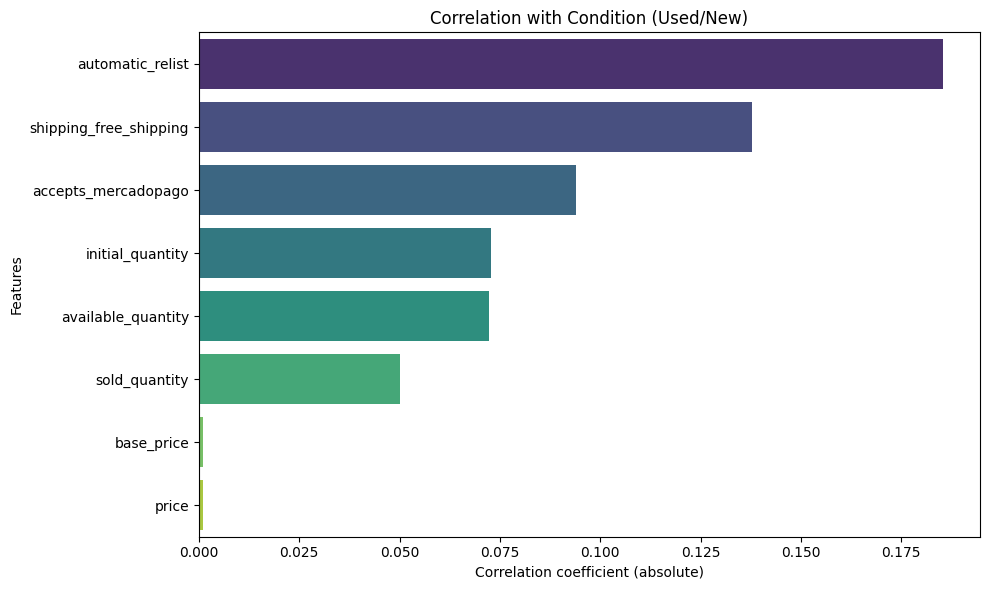

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=corr.values,
    y=corr.index,
    palette='viridis'
)
plt.title('Correlation with Condition (Used/New)')
plt.xlabel('Correlation coefficient (absolute)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

Analizamos la correlación entre la variable objetivo condition y otras variables numéricas del dataset. Las correlaciones más altas son con automatic_relist (0.185) y shipping_free_shipping (0.138), aunque ambas son bajas, lo que indica una relación lineal débil. Variables como price y base_price tienen correlaciones prácticamente nulas (0.000948), sugiriendo que no tienen relación lineal con la condición del producto.

#### Chi2

In [44]:
df = data.copy()

X_cat = df.select_dtypes(include=['object'])  
X_cat_encoded = pd.get_dummies(X_cat, drop_first=True)

y = df['condition'] 

chi_scores, _ = chi2(X_cat_encoded, y)

chi2_df = pd.Series(chi_scores, index=X_cat_encoded.columns).sort_values(ascending=False)

print(chi2_df.head(10))

listing_type_id_free            18489.050784
listing_type_id_silver           2534.922212
listing_type_id_gold_special     2396.181093
listing_type_id_gold             1049.345288
buying_mode_classified            865.328134
category_id_MLA2044               666.211229
category_id_MLA2038               629.119334
category_id_MLA41287              607.049067
category_id_MLA15328              527.721047
shipping_mode_not_specified       434.179205
dtype: float64


Realizamos un análisis de chi-cuadrado para evaluar la asociación entre variables categóricas codificadas y la variable objetivo condition. Las variables más influyentes son listing_type_id_free (puntaje: 18489.05), listing_type_id_silver (2534.92) y listing_type_id_gold_special (2396.18), lo que indica que el tipo de listado tiene una fuerte relación con la condición del producto. También se observan asociaciones moderadas con categorías específicas (category_id_MLA2044, category_id_MLA2038) y el modo de compra (buying_mode_classified). Esto sugiere que el tipo de listado y la categoría del producto son factores clave para predecir la condición,

#### PCA

In [45]:
X = df_muestra.drop(columns=['condition'])  
X_encoded = pd.get_dummies(X, drop_first=True)  

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

pca = PCA()
pca.fit(X_scaled)

importance = pd.DataFrame(
    data=abs(pca.components_),
    columns=X_encoded.columns
)

variable_importance = importance.sum(axis=0).sort_values(ascending=False)

print(variable_importance.head(10).to_string())

category_id_MLA116599    14.134807
category_id_MLA45559     14.054174
category_id_MLA31033     13.994624
category_id_MLA1503      13.992372
category_id_MLA45558     13.981832
category_id_MLA372038    13.972333
category_id_MLA48851     13.954599
category_id_MLA1417      13.893923
category_id_MLA95993     13.882186
category_id_MLA44032     13.863444


Realizamos un análisis de componentes principales (PCA) en las variables codificadas del dataset para identificar las características que contribuyen más a la varianza total. Las categorías de productos (category_id) como MLA116599 (14.13), MLA45559 (14.05) y MLA31033 (13.99) muestran las mayores importancias, indicando que las diferencias entre categorías de productos dominan la estructura de los datos.

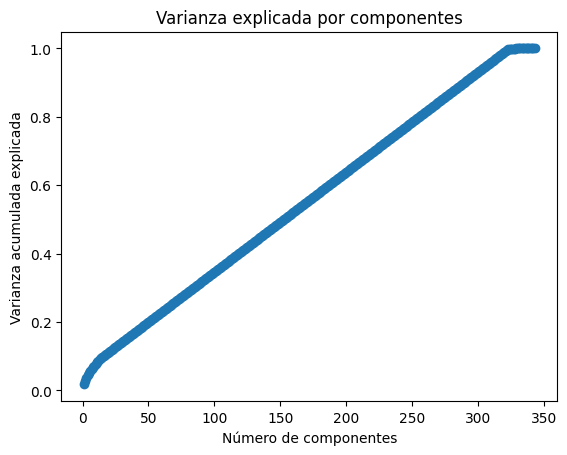

In [51]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada explicada')
plt.title('Varianza explicada por componentes')
plt.show()

La gráfica de varianza explicada por componentes muestra cómo la varianza acumulada de los datos aumenta con el número de componentes principales. Los primeros 50-100 componentes capturan una gran parte de la varianza (aproximadamente 50%-60%), mientras que cerca de 200 componentes alcanzan el 80%-90%. La curva se estabiliza cerca de 1.0 con los 350 componentes, lo que indica que toda la varianza se explica al usar todas las variables originales.

#### Columnas seleccionadas 

Estas son las variables consideradas más relevantes según los análisis de correlación, chi-cuadrado y PCA:

-   `automatic_relist`: Indica si el producto se vuelve a publicar automáticamente.
    
-   `shipping_free_shipping`: Señala si el envío es gratuito.
    
-   `accepts_mercadopago`: Indica si se acepta MercadoPago como medio de pago.
    
-   `initial_quantity`: Cantidad inicial del producto publicado.
    
-   `available_quantity`: Cantidad disponible al momento del análisis.
    
-   `sold_quantity`: Número de unidades vendidas.
    
-   `base_price`: Precio base sin descuentos.
    
-   `price`: Precio final publicado.
    
-   `listing_type_id`: Tipo de publicación (ej. gold, silver, free).
    
-   `buying_mode`: Modo de compra (ej. clásico, inmediato).
    
-   `category_id`: Categoría del producto publicada (informativa aunque sea un ID).
    
-   `shipping_mode`: Modo de envío del producto.
    
-   `condition`: **Variable objetivo** que indica si el producto es nuevo (`0`) o usado (`1`).




In [53]:
columnas_relevantes = [
    'automatic_relist', 'shipping_free_shipping', 'accepts_mercadopago',
    'initial_quantity', 'available_quantity', 'sold_quantity',
    'base_price', 'price', 'listing_type_id', 'buying_mode',
    'category_id', 'shipping_mode', 'condition' 
]

#### Guardar el dataset limpio

Se guarda el dataframe limpio en la carpeta de data

In [48]:
df_filtrado = data[columnas_relevantes].copy()

df_filtrado.to_csv("../data/1_final/clean_datasetn.csv", index=False)